# Faire des dico pour recup valeurs correspondantes des colonnes

###### https://github.com/CyrilShch/Drugs.-Predict-drug-consumption-using-a-set-of-demographic-data-and-five-personality-measurements/blob/master/hw2_Kirill_Shcherbakov-1.ipynb

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the dataframe
df=pd.read_csv("drug_consumption.csv",sep=";")

In [3]:
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
len(df)

1885

In [5]:
#Count the numer of missing values
df.isna().sum()

#There is no missing values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [6]:
df.nunique()

#We have 1885 observations with 1885 IDs

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [7]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

# Class participants into groups: users and non-users
##### The different usages are : ‘Used in last day’ , ‘Used in last week’, ‘Used in last month’, ‘Used in last year’ , ‘Used in last decade’, ‘Never used’, ‘Used over a decade ago’
##### Thus, the users will be those that belong to ‘Used in last day’ , ‘Used in last week’, ‘Used in last month’, and the others will be non-users

In [9]:
# 1 = Users
# 0 = Non-users

def user(a):
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = 0
    return a

In [10]:
# Applying our changes in classification of drug consumption to columns with drugs

df['Amphet'] = df['Amphet'].map(user)

df['Amyl'] = df['Amyl'].map(user)

df['Benzos'] = df['Benzos'].map(user)

df['Cannabis'] = df['Cannabis'].map(user)

df['Coke'] = df['Coke'].map(user)

df['Crack'] = df['Crack'].map(user)

df['Ecstasy'] = df['Ecstasy'].map(user)

df['Heroin'] = df['Heroin'].map(user)

df['Ketamine'] = df['Ketamine'].map(user)

df['LSD'] = df['LSD'].map(user)

df['Meth'] = df['Meth'].map(user)

df['Mushrooms'] = df['Mushrooms'].map(user)

df['Semer'] = df['Semer'].map(user)

df['VSA'] = df['VSA'].map(user)

df['Alcohol'] = df['Alcohol'].map(user)

df['Legalh'] = df['Legalh'].map(user)

df['Nicotine'] = df['Nicotine'].map(user)

df['Choc'] = df['Choc'].map(user)

df['Caff'] = df['Caff'].map(user)

## Different types of drugs : classification
###### 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'

In [11]:
#Distintion drogues dures et drogues douces ? NON

#Cette distinction entre drogues « douces » et « dures », utilisée parfois même dans les milieux 
#scientifiques, est sans rapport avec la réalité, et sans doute davantage liée à leur acceptation sociale. De nos jours, 
#les experts et acteurs de terrain préfèrent appliquer les qualificatifs de « dur » et « doux » aux usages qui sont faits 
#des substances plutôt qu’aux substances elles-mêmes : il est en effet possible de faire un usage « dur » d’une substance 
#perçue comme « douce », tout comme on peut observer des usages « doux » (maîtrisés et non problématiques) de substances 
#réputées « dures »…

#-----------------------------------------------

#According to the classification available on : https://www.health.gov.au/health-topics/drugs/about-drugs/types-of-drugs

# Depressants: Alcohol, Amyl, Benzos, Cannabis, Ketamine, Heroin, VSA
# Stimulants: Amphet, Caff, Coke, Meth, Nicotine, Crack, Ecstasy
# Psychedelics: LSD, Mushrooms
# Psychoactive: Legalh

#We just can't join Choc (chocolate) and Semer (semeron, fictional drug) to a group...

In [12]:
df['Depressants'] = df.apply(lambda x: int((x['Alcohol'] + x['Amyl'] + x['Benzos'] + x['Cannabis']+ x['Ketamine']+ x['Heroin']+ x['VSA'])>0), axis = 1)

df['Stimulants'] = df.apply(lambda x: int((x['Amphet'] + x['Caff'] + x['Coke'] + x['Meth']+ x['Nicotine']+ x['Crack']+ x['Ecstasy'])>0), axis = 1)

df['Psychedelics'] = df.apply(lambda x: int((x['LSD'] + x['Mushrooms'])>0), axis = 1)

#and the others...

In [13]:
df.drop(['Caff','Nicotine','Alcohol','Amphet','Amyl','Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA'], axis = 1, inplace = True)

In [40]:
df[drugs].apply(pd.Series.value_counts).T

,0,1
Choc,99,1786
Legalh,1644,241
Semer,1884,1
Depressants,172,1713
Stimulants,79,1806
Psychedelics,1638,247


##### We see that tere is only one user of Semer, so we can drop this drug that won't help us

In [42]:
del df['Semer']

In [44]:
drugs

['Choc', 'Legalh', 'Semer', 'Depressants', 'Stimulants', 'Psychedelics']

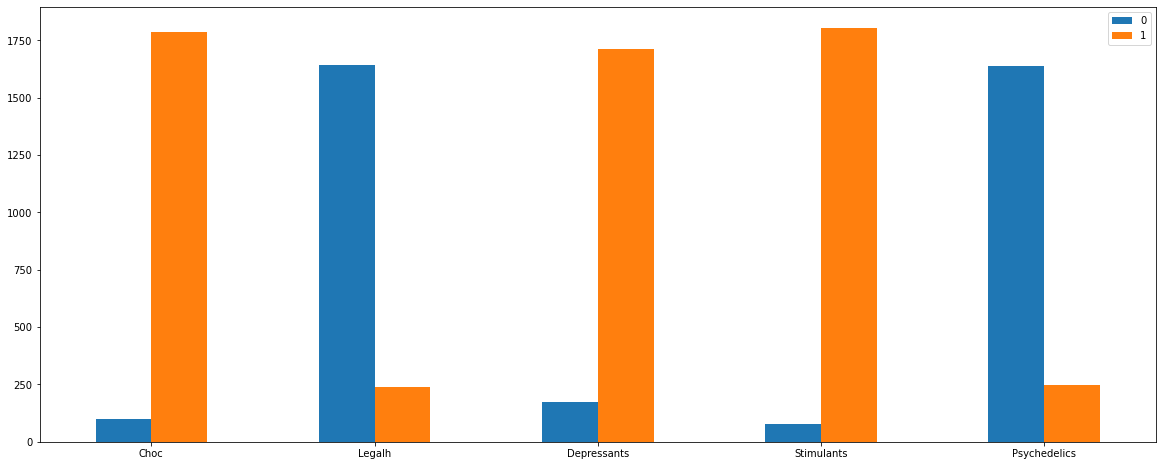

In [45]:
drugs=['Choc', 'Legalh', 'Depressants', 'Stimulants', 'Psychedelics']
df[drugs].apply(pd.Series.value_counts).T.plot(kind='bar',rot=0, figsize=(20,8));

### Decode Age column

##### 18-24 age = 0
##### 25-34 age = 1
##### 35-44 age = 2
##### 45-54 age = 3
##### 55-64 age = 4
##### 65+   age = 5

In [50]:
# After trying the function bellow, there is a problem with the float of the Age variable ! (same for Gender, ect...)
def toFormat(x):
    x = float('{:.5f}'.format(x))
    return x

for i in list(df.columns):
    df[i] = df[i].map(toFormat)

In [51]:
def toAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

df['Age'] = df['Age'].map(toAge)

### Decode Gender

##### Female = 0
##### Male = 1

In [52]:
def toGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

df['Gender'] = df['Gender'].map(toGender)

### Decode Education

##### Left school before 16 years = 0
##### Left school at 16 years = 1
##### Left school at 17 years = 2
##### Left school at 18 years = 3
##### Some college or university, no certificate or degree = 4
##### Professional certificate/ diploma = 5
##### University degree = 6
##### Masters degree = 7
##### Doctorate degree = 8

In [53]:
def toEducation(x):
    if (x == -2.43591):
        x = 0
    elif (x == -1.73790):
        x = 1
    elif (x == -1.43719):
        x = 2
    elif (x == -1.22751):
        x = 3
    elif (x == -0.61113):
        x = 4
    elif (x == -0.05921):
        x = 5
    elif (x == 0.45468):
        x = 6
    elif (x == 1.16365):
        x = 7
    elif (x == 1.98437):
        x = 8
    return x

df['Education'] = df['Education'].map(toEducation)

### Decode country

##### Australia = 0
##### Canada = 1
##### New Zealand = 2
##### Other = 3
##### Republic of Ireland = 4
##### UK = 5
##### USA = 6

In [54]:
def toCountry(x):
    if (x == -0.09765):
        x = 0
    elif (x == 0.24923):
        x = 1
    elif (x == -0.46841):
        x = 2
    elif (x == -0.28519):
        x = 3
    elif (x == 0.21128):
        x = 4
    elif (x == 0.96082):
        x = 5
    elif (x == -0.57009):
        x = 6
    return x

df['Country'] = df['Country'].map(toCountry)

### Decode Ethnicity

##### Asian = 0
##### Black = 1
##### Mixed-Black/Asian = 2
##### Mixed-White/Asian = 3
##### Mixed-White/Black = 4
##### Other = 5
##### White = 6

In [55]:
def toEthnicity(x):
    if (x == -0.50212):
        x = 0
    elif (x == -1.10702):
        x = 1
    elif (x == 1.90725):
        x = 2
    elif (x == 0.12600):
        x = 3
    elif (x == -0.22166):
        x = 4
    elif (x == 0.11440):
        x = 5
    elif (x == -0.31685):
        x = 6
    return x

df['Ethnicity'] = df['Ethnicity'].map(toEthnicity)

# CORRELATION

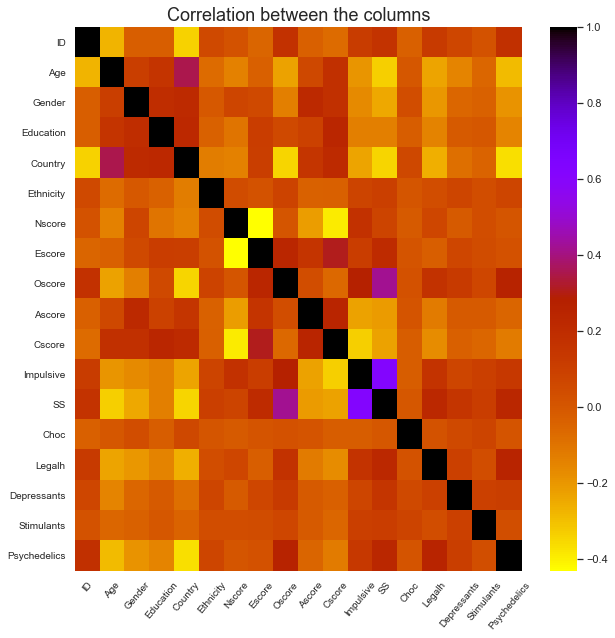

In [46]:
cm = df.corr()

plt.figure(figsize=(10,10))

sns.set(font_scale=1)
hm = sns.heatmap(cm,cmap = 'gnuplot_r', yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=10,rotation=50)
plt.yticks(fontsize=10)
plt.title("Correlation between the columns",fontsize=18)
plt.show()

###### There is not much correlation between the features. Excpept maybe between Impulsivity and SS, and between Oscore ans SS

In [ ]:
# Create a correlation matrix
# We separate target columns and create 3 new dataset variables in order
# to compare dependance features on every target variable

# Depressants: Alcohol, Amyl, Benzos, Cannabis, Ketamine, Heroin, VSA
# Stimulants: Amphet, Caff, Coke, Meth, Nicotine, Crack, Ecstasy
# Psychedelics: LSD, Mushrooms
# Psychoactive: Legalh

#We just can't join Choc (chocolate) and Semer (semeron, fictional drug) to a group...

data1 = df.drop(['Depressants', 'Stimulants'], axis=1)
data2= df.drop(['Psychedelics', 'Stimulants'], axis=1)
data3= df.drop(['Psychedelics', 'Depressants'], axis=1)

corr1 = data1.corr()
corr2 = data2.corr()
corr3 = data3.corr()

# correlation tables

corr_on_Psychedelics = data1.corrwith(data1.Psychedelics)
corr_on_Psychedelics_dict = corr_on_Psychedelics.to_dict()

corr_on_Depressants = data2.corrwith(data2.Depressants)
corr_on_Depressants_dict = corr_on_Depressants.to_dict()

corr_on_Stimulants = data3.corrwith(data3.Stimulants)
corr_on_Stimulants_dict = corr_on_Stimulants.to_dict()

In [ ]:
corr_on_Psychedelics_dict

## Number of people per country

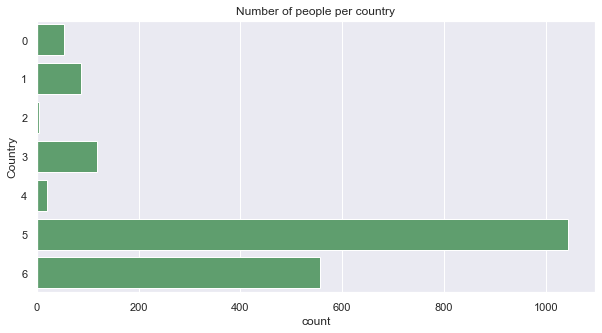

In [66]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Country", data=df, color="g");
plt.title('Number of people per country');

###### We see that there is almost only UK and USA people

## Number of people per ethnicity

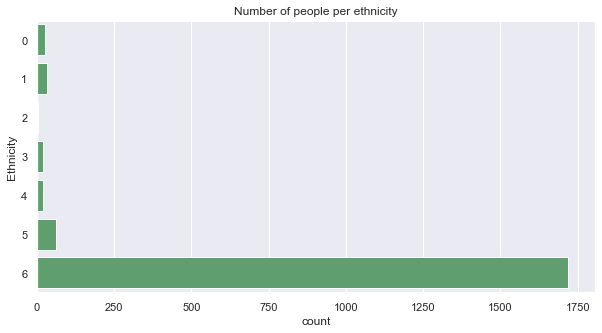

In [65]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Ethnicity", data=df, color="g");
plt.title('Number of people per ethnicity');

###### There is almost only white people

In [62]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Choc',
       'Legalh', 'Depressants', 'Stimulants', 'Psychedelics'],
      dtype='object')

### Number of people per ethnicity

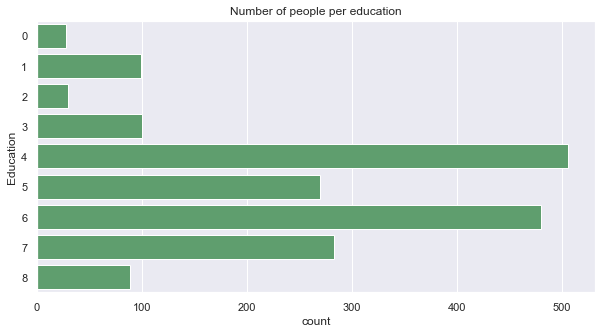

In [64]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Education", data=df, color="g");
plt.title('Number of people per education');

###### Education is better distributed